In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import sklearn
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, precision_score, log_loss, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
df = pd.read_csv(r"Road_accident_analysis\database\6accident_data.csv", low_memory=False, encoding='ISO-8859-1')


In [3]:
df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200754AM08507,A,345,NaN,0.0,Fatal,None,28-01-2021,Tuesday,1,...,Skidded,No tow/articulation,Offside,0,Overtaking moving vehicle - offside,1,Car,No,Back,2021
1,2009559D02192,A,30,NaN,0.0,Fatal,None,29-11-2021,Thursday,1,...,None,No tow/articulation,Offside,0,Going ahead left-hand bend,1,Motorcycle over 500cc,No,Front,2020
2,201054MB04210,Motorway,4,NaN,0.0,Fatal,None,15-03-2021,Saturday,1,...,None,No tow/articulation,Did not leave carriageway,0,Going ahead other,2,Motorcycle over 125cc and up to 500cc,No,Back,2019
3,201014A194610,Motorway,18,A,630.0,Fatal,None,08-07-2020,Tuesday,1,...,None,No tow/articulation,Did not leave carriageway,0,Reversing,3,Other vehicle,No,Back,2019
4,201014A194610,Motorway,18,A,630.0,Fatal,None,30-11-2010,Tuesday,1,...,None,No tow/articulation,Did not leave carriageway,0,Reversing,3,Other vehicle,No,Back,2010


In [4]:
print(df.isnull().sum())

Accident_Index                                     0
1st_Road_Class                                     0
1st_Road_Number                                    0
2nd_Road_Class                                 11419
2nd_Road_Number                                  290
Accident_Severity                                  0
Carriageway_Hazards                                0
Date                                               0
Day_of_Week                                        0
Did_Police_Officer_Attend_Scene_of_Accident        0
Junction_Control                                   0
Junction_Detail                                    0
Latitude                                           0
Light_Conditions                                   0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
LSOA_of_Accident_Location                        493
Number_of_Casualties                          

In [5]:
#check columns
print("\n",df.columns)
print("\n",df.shape)


 Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Road_Surface_Conditions',
       'Road_Type', 'Special_Conditions_at_Site', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'InScotland',
       'Age_Band_of_Driver', 'Age_of_Vehicle', 'Driver_Home_Area_Type',
       'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',
       'Journey_Purpose_of_Driver', 'Junction_Location', 'make', 'model',
       'Propulsi

In [6]:
df.describe(include ='all')

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
count,26001,26001,26001.000000,14582,25711.000000,26001,26001,26001,26001,26001.000000,...,26001,26001,26001,26001.000000,26001,26001.000000,26001,26001,26001,26001.000000
unique,18837,6,NaN,6,NaN,3,6,1460,7,NaN,...,6,6,9,NaN,18,NaN,13,3,6,NaN
top,201006XP26465,A,NaN,Unclassified,NaN,Slight,None,12-11-2010,Friday,NaN,...,None,No tow/articulation,Did not leave carriageway,NaN,Going ahead other,NaN,Car,No,Front,NaN
freq,9,12508,NaN,9895,NaN,17775,25443,82,4340,NaN,...,19441,25751,20362,NaN,12552,NaN,19621,25975,14638,NaN
mean,NaN,NaN,982.875812,NaN,435.147058,NaN,NaN,NaN,NaN,1.093843,...,NaN,NaN,NaN,0.077497,NaN,1.441021,NaN,NaN,NaN,2014.482405
std,NaN,NaN,1789.917052,NaN,1446.424444,NaN,NaN,NaN,NaN,0.295545,...,NaN,NaN,NaN,0.749432,NaN,0.719022,NaN,NaN,NaN,4.929699
min,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,2010.000000
25%,NaN,NaN,4.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,2010.000000
50%,NaN,NaN,158.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,2010.000000
75%,NaN,NaN,684.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN,NaN,2020.000000


### DataCleaning

In [7]:
df = df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1)

In [8]:
df.shape

(26001, 51)

In [9]:
#standardize all column names to lowercase, and remove some characters 
#for ease of use in querying
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(".",'')
df.columns = df.columns.str.replace("(",'')
df.columns = df.columns.str.replace(")",'')

C:\Users\shivk\AppData\Local\Temp\ipykernel_5372\2964611213.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(".",'')
C:\Users\shivk\AppData\Local\Temp\ipykernel_5372\2964611213.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace("(",'')
C:\Users\shivk\AppData\Local\Temp\ipykernel_5372\2964611213.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(")",'')


In [10]:
#convert date/time to datetime datatype

df['date'] = pd.to_datetime((df['date']), format= "%d-%m-%Y")

In [11]:
df.dtypes

accident_index                                         object
1st_road_class                                         object
1st_road_number                                         int64
2nd_road_class                                         object
2nd_road_number                                       float64
accident_severity                                      object
carriageway_hazards                                    object
date                                           datetime64[ns]
day_of_week                                            object
did_police_officer_attend_scene_of_accident             int64
junction_control                                       object
junction_detail                                        object
latitude                                              float64
light_conditions                                       object
longitude                                             float64
lsoa_of_accident_location                              object
number_o

In [12]:
#mistyped datatypes
df[['did_police_officer_attend_scene_of_accident',
    '1st_road_number',
    '2nd_road_number',
    'pedestrian_crossing-physical_facilities',
    'pedestrian_crossing-human_control']]= df[['did_police_officer_attend_scene_of_accident',
    '1st_road_number',
    '2nd_road_number',
    'pedestrian_crossing-physical_facilities',
   'pedestrian_crossing-human_control']].astype('object')

In [13]:
df.columns.to_series().groupby(df.dtypes).groups

{datetime64[ns]: ['date'], int64: ['number_of_casualties', 'number_of_vehicles', 'speed_limit', 'age_of_vehicle', 'vehicle_locationrestricted_lane', 'vehicle_reference', 'year'], float64: ['latitude', 'longitude', 'driver_imd_decile', 'engine_capacity_cc'], object: ['accident_index', '1st_road_class', '1st_road_number', '2nd_road_class', '2nd_road_number', 'accident_severity', 'carriageway_hazards', 'day_of_week', 'did_police_officer_attend_scene_of_accident', 'junction_control', 'junction_detail', 'light_conditions', 'lsoa_of_accident_location', 'pedestrian_crossing-human_control', 'pedestrian_crossing-physical_facilities', 'road_surface_conditions', 'road_type', 'special_conditions_at_site', 'time', 'urban_or_rural_area', 'weather_conditions', 'inscotland', 'age_band_of_driver', 'driver_home_area_type', 'hit_object_in_carriageway', 'hit_object_off_carriageway', 'journey_purpose_of_driver', 'junction_location', 'make', 'model', 'propulsion_code', 'sex_of_driver', 'skidding_and_overtur

In [14]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

2nd_road_class                                 43.917542
make                                           21.295335
driver_imd_decile                              12.172609
model                                           7.949694
lsoa_of_accident_location                       1.896081
2nd_road_number                                 1.115342
engine_capacity_cc                              0.507673
accident_index                                  0.000000
age_of_vehicle                                  0.000000
driver_home_area_type                           0.000000
hit_object_in_carriageway                       0.000000
hit_object_off_carriageway                      0.000000
journey_purpose_of_driver                       0.000000
junction_location                               0.000000
sex_of_driver                                   0.000000
propulsion_code                                 0.000000
inscotland                                      0.000000
skidding_and_overturning       

In [15]:
df['2nd_road_class'].value_counts()/df.shape[0]*100

Unclassified    38.056229
A                8.465059
C                5.230568
B                3.711396
Motorway         0.569209
A(M)             0.049998
Name: 2nd_road_class, dtype: float64

In [16]:
#df = df.drop(['2nd_road_class'], axis=1)

In [17]:
df['driver_imd_decile'].fillna(method='ffill', inplace=True)

In [18]:
df['age_of_vehicle'].describe()

count    26001.000000
mean         7.701204
std          4.465731
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         58.000000
Name: age_of_vehicle, dtype: float64

In [19]:
df['age_of_vehicle'].median()

7.0

In [20]:
df['age_of_vehicle'].fillna(7, inplace=True)

def fixedvehicleage(age):
    if age>=0 and age<=120:
        return age
    else:
        return np.nan

df['age_of_vehicle'] = df['age_of_vehicle'].apply(fixedvehicleage)

df['age_of_vehicle'] = pd.cut(df['age_of_vehicle'], [0,2,5,8,11,14,17,120], labels=['1', '2', '3','4','5','6','7'])

In [21]:
df['age_of_vehicle'].value_counts()/df.shape[0]*100

3    23.806777
4    22.502981
2    22.333756
1    12.576439
5    12.322603
6     4.222915
7     2.234529
Name: age_of_vehicle, dtype: float64

In [23]:
df['age_of_vehicle'].value_counts()/df.shape[0]*100

3    23.806777
4    22.502981
2    22.333756
1    12.576439
5    12.322603
6     4.222915
7     2.234529
Name: age_of_vehicle, dtype: float64

In [24]:
df['model'].value_counts()/df.shape[0]*100

KA                    1.449944
CLIO DYNAMIQUE 16V    1.134572
KA 2                  0.680743
PUNTO 1.2             0.646129
SAXO VTR              0.634591
                        ...   
121 GSI 16V           0.003846
C5 HDI LX AUTO        0.003846
330I SE AUTO          0.003846
106 EXTRA TIME        0.003846
A4 SE TDI 6SP         0.003846
Name: model, Length: 5119, dtype: float64

In [25]:
df['model'].describe()

count     23934
unique     5119
top          KA
freq        377
Name: model, dtype: object

In [26]:
df['model'].fillna(method='ffill', inplace=True)

In [27]:
#engine_capacity_cc
#df['engine_capacity_cc'].describe()


In [28]:
#quantiles and the interquartile range (IQR).
#q75, q25 = np.percentile(df['engine_capacity_cc'].dropna(), [75 ,25])
#iqr = q75 - q25
 
#ecmin = q25 - (iqr*1.5)
#ecmax = q75 + (iqr*1.5)

#print(ecmax)
#print(ecmin)

In [29]:
#df = df[df['engine_capacity_cc']<=ecmax]

In [30]:
#df = df[df['engine_capacity_cc']>=ecmin]

In [31]:
#df['engine_capacity_cc'].describe()

In [32]:
#df['engine_capacity_cc'].mean()


In [33]:
#df['engine_capacity_cc'].fillna(1652, inplace=True)


In [34]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100


2nd_road_class                                 43.917542
make                                           21.295335
lsoa_of_accident_location                       1.896081
2nd_road_number                                 1.115342
engine_capacity_cc                              0.507673
accident_index                                  0.000000
age_of_vehicle                                  0.000000
driver_home_area_type                           0.000000
driver_imd_decile                               0.000000
hit_object_in_carriageway                       0.000000
hit_object_off_carriageway                      0.000000
journey_purpose_of_driver                       0.000000
junction_location                               0.000000
model                                           0.000000
sex_of_driver                                   0.000000
propulsion_code                                 0.000000
inscotland                                      0.000000
skidding_and_overturning       

In [35]:
df = df.drop(['lsoa_of_accident_location', '2nd_road_number','make'], axis=1)

In [36]:
df.dropna(inplace=True)
#last check
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

accident_index                                 0.0
1st_road_class                                 0.0
age_band_of_driver                             0.0
age_of_vehicle                                 0.0
driver_home_area_type                          0.0
driver_imd_decile                              0.0
engine_capacity_cc                             0.0
hit_object_in_carriageway                      0.0
hit_object_off_carriageway                     0.0
journey_purpose_of_driver                      0.0
junction_location                              0.0
model                                          0.0
propulsion_code                                0.0
sex_of_driver                                  0.0
skidding_and_overturning                       0.0
towing_and_articulation                        0.0
vehicle_leaving_carriageway                    0.0
vehicle_locationrestricted_lane                0.0
vehicle_manoeuvre                              0.0
vehicle_reference              

In [37]:
df.shape

(14507, 48)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14507 entries, 5 to 25999
Data columns (total 48 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               14507 non-null  object        
 1   1st_road_class                               14507 non-null  object        
 2   1st_road_number                              14507 non-null  object        
 3   2nd_road_class                               14507 non-null  object        
 4   accident_severity                            14507 non-null  object        
 5   carriageway_hazards                          14507 non-null  object        
 6   date                                         14507 non-null  datetime64[ns]
 7   day_of_week                                  14507 non-null  object        
 8   did_police_officer_attend_scene_of_accident  14507 non-null  object        


In [39]:
df_num = df[['number_of_casualties','number_of_vehicles','speed_limit']]

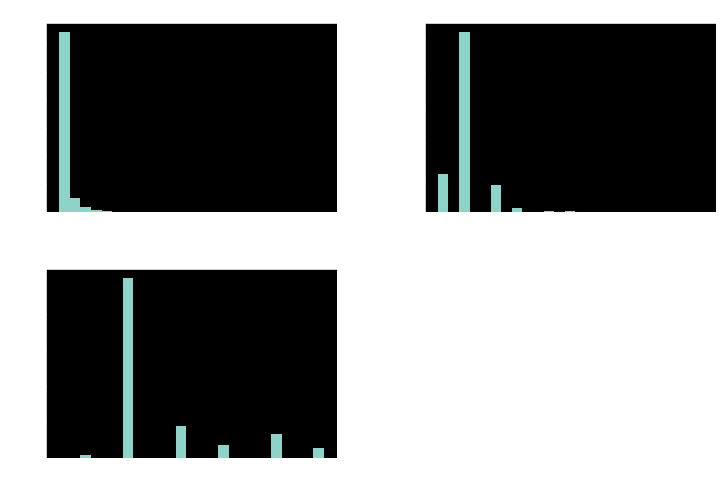

In [40]:
df_num.hist( bins=25, grid=False, figsize=(12,8))
plt.style.use('dark_background')


In [41]:
df['number_of_casualties'].value_counts()


1     9866
2     3015
3     1022
4      377
5      134
6       62
7       17
8        5
9        3
11       2
10       2
29       1
18       1
Name: number_of_casualties, dtype: int64

In [42]:
def casualities(num_cas):
    if num_cas >=1 and num_cas <2:
        return "1"
    elif num_cas >=2 and num_cas <3:
        return "2"
    elif num_cas >=3 and num_cas <4:
        return "3"
    elif num_cas >= 4 and num_cas <5:
        return "4"
    elif num_cas >= 5:
        return "5+"
    
df['number_of_casualties']= df['number_of_casualties'].apply(casualities)

In [43]:
df['number_of_casualties'].value_counts()


1     9866
2     3015
3     1022
4      377
5+     227
Name: number_of_casualties, dtype: int64

In [44]:
df['propulsion_code'].value_counts()/df.shape[0]*100

Petrol              81.353829
Heavy oil           18.473840
Gas/Bi-fuel          0.068932
Hybrid electric      0.055146
Petrol/Gas (LPG)     0.041359
Gas                  0.006893
Name: propulsion_code, dtype: float64

In [45]:
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas", value="Petrol")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas/Bi-fuel", value="Bio-fuel")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Petrol/Gas (LPG)", value="LPG Petrol")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas Diesel", value="Diesel")

In [46]:
df['propulsion_code'].value_counts()/df.shape[0]*100


Petrol             81.360722
Heavy oil          18.473840
Bio-fuel            0.068932
Hybrid electric     0.055146
LPG Petrol          0.041359
Name: propulsion_code, dtype: float64

In [47]:
df.nunique().sort_values(ascending=False)

longitude                                      12845
latitude                                       12836
accident_index                                 10412
model                                           3689
1st_road_number                                 1642
date                                            1450
time                                            1285
engine_capacity_cc                               541
vehicle_manoeuvre                                 18
vehicle_type                                      13
hit_object_in_carriageway                         12
hit_object_off_carriageway                        10
driver_imd_decile                                 10
vehicle_leaving_carriageway                        9
junction_location                                  9
age_band_of_driver                                 9
weather_conditions                                 9
number_of_vehicles                                 9
junction_detail                               

In [48]:
df['date'] = pd.to_datetime(df['date'])

In [49]:
df['month'] = df ['date'].apply(lambda time: time.month)


In [50]:
#creating a weekend feature that includes Friday-Sunday
df['weekend']= np.where(df['day_of_week'].isin(['Friday', 'Saturday', 'Sunday']), 1, 0)


In [51]:
timeofdaygroups = {1: "Morning Rush (6-10)",
                   2: "Day (10-12)",
                   3: "Lunch Rush (12-14)",
                   4: "Afternoon (14-16)",
                   5: "After Work Rush (16-18)",
                   6: "Evening (18-22)",
                   7: "Night (22-6)"}

In [52]:
df['hour'] = df['time'].str[0:2]  
df['hour'] =  pd.to_numeric(df['hour'])
df['hour'] = df['hour'].astype('int')

In [53]:
def daygroup(hour):
    if hour >= 6 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 12:
        return "2"
    elif hour >= 12 and hour < 14:
        return "3"
    elif hour >= 14 and hour < 16:
        return "4"
    elif hour >= 16 and hour < 18:
        return "5"
    elif hour >= 18 and hour < 22:
        return "6"
    else:
        return "7"
    
df['time_of_day']= df['hour'].apply(daygroup)   

In [54]:
df[['weekend','day_of_week','time', 'time_of_day']].tail(10)

,weekend,day_of_week,time,time_of_day
25990,0,Monday,17:05:00,5
25991,1,Saturday,13:00:00,3
25992,1,Friday,18:15:00,6
25993,0,Monday,14:59:00,4
25994,0,Monday,15:00:00,4
25995,0,Monday,16:45:00,5
25996,1,Friday,18:50:00,6
25997,1,Friday,13:30:00,3
25998,0,Tuesday,17:50:00,5
25999,0,Monday,08:25:00,1


In [55]:
df.shape

(14507, 52)

In [56]:
df['vehicle_type'].value_counts()/df.shape[0]*100

Car                                      74.122837
Motorcycle 125cc and under                7.975460
Motorcycle 50cc and under                 5.238850
Motorcycle over 500cc                     4.549528
Van / Goods 3.5 tonnes mgw or under       3.281175
Motorcycle over 125cc and up to 500cc     2.095540
Bus or coach (17 or more pass seats)      0.889226
Goods 7.5 tonnes mgw and over             0.772041
Taxi/Private hire car                     0.689322
Goods over 3.5t. and under 7.5t           0.172331
Other vehicle                             0.117185
Minibus (8 - 16 passenger seats)          0.062039
Agricultural vehicle                      0.034466
Name: vehicle_type, dtype: float64

In [57]:

df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle over 500cc", value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace= "Motorcycle over 125cc and up to 500cc",value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 125cc and under", value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 50cc and under", value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle - unknown cc", value="Motorcycle")

df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Van / Goods 3.5 tonnes mgw or under", value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods over 3.5t. and under 7.5t", value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods 7.5 tonnes mgw and over", value="Goods Vehicle")

df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Taxi/Private hire car", value="Car")

df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Minibus (8 - 16 passenger seats)", value="Bus")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Bus or coach (17 or more pass seats)",value="Bus")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Agricultural vehicle", value="Other Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Other vehicle", value="Other Vehicle")

In [58]:
df['vehicle_type'].value_counts()/df.shape[0]*100

Car              74.812160
Motorcycle       19.859378
Goods Vehicle     4.225546
Bus               0.951265
Other Vehicle     0.151651
Name: vehicle_type, dtype: float64

In [59]:
df['age_band_of_driver'].value_counts()/df.shape[0]*100


16 - 20                         53.787827
21 - 25                         34.728062
46 - 55                          4.990694
26 - 35                          4.687392
36 - 45                          1.413111
56 - 65                          0.172331
Over 75                          0.103398
66 - 75                          0.103398
Data missing or out of range     0.013786
Name: age_band_of_driver, dtype: float64

In [60]:
df['age_band_of_driver']=df['age_band_of_driver'].replace("Over 75","75-100")

In [61]:
#df.drop(df[df['age_band_of_driver'] == 'Data missing or out of range'].index, inplace=True)
df['age_band_of_driver']=df['age_band_of_driver'].replace("Data missing or out of range","11 - 15")

In [62]:
df.drop(df[df['age_band_of_driver'] == 'Nov-15'].index, inplace=True)

In [63]:
df.drop(df[df['age_band_of_driver'] == '06-Oct'].index, inplace=True)

In [64]:
df['age_band_of_driver'].value_counts()/df.shape[0]*100

16 - 20    53.787827
21 - 25    34.728062
46 - 55     4.990694
26 - 35     4.687392
36 - 45     1.413111
56 - 65     0.172331
75-100      0.103398
66 - 75     0.103398
11 - 15     0.013786
Name: age_band_of_driver, dtype: float64

In [65]:
age1 = ["0 - 5", "6 - 10", "11 - 15"]
age2 = ["16 - 20","21 - 25"]
age3 = ["26 - 35","36 - 45"]
age4 = ["46 - 55", "56 - 65"]
age5 = ["66 - 75", "75-100"]

In [66]:
for (row, col) in df.iterrows():

    if str.lower(col.age_band_of_driver) in age1:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, value='Under 16', inplace=True)

    if str.lower(col.age_band_of_driver) in age2:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, value='16-25', inplace=True)
    
    if str.lower(col.age_band_of_driver) in age3:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, value='26-45', inplace=True)
    if str.lower(col.age_band_of_driver) in age4:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, value='46-65', inplace=True)
    if str.lower(col.age_band_of_driver) in age5:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, value='Over 65', inplace=True)

In [67]:
print("Distinct responses for age_band_of_driver:\n", set(df['age_band_of_driver']))

Distinct responses for age_band_of_driver:
 {'Over 65', 'Under 16', '16-25', '26-45', '46-65'}


In [68]:
df.shape

(14507, 52)

In [69]:
df['number_of_vehicles'].value_counts()/df.shape[0]*100

2     71.524092
1     15.254705
3     10.753429
4      1.785345
5      0.358448
6      0.255049
7      0.048253
8      0.013786
11     0.006893
Name: number_of_vehicles, dtype: float64

In [70]:
def vehicles(num_veh):
    if num_veh >=1 and num_veh <2:
        return "1"
    elif num_veh >=2 and num_veh <3:
        return "2"
    elif num_veh >=3 and num_veh <4:
        return "3"
    elif num_veh >= 4: 
        return "4+"
  

df['number_of_vehicles']= df['number_of_vehicles'].apply(vehicles)

In [71]:
df['number_of_vehicles'].value_counts()/df.shape[0]*100

2     71.524092
1     15.254705
3     10.753429
4+     2.467774
Name: number_of_vehicles, dtype: float64

In [72]:
df['number_of_vehicles'].dtypes

dtype('O')

In [73]:
df['number_of_vehicles']=df['number_of_vehicles'].astype('object')

In [74]:
def getSeason(month):
    if (month == 2 or month == 12 or month == 1):
       return "Winter"
    elif(month == 6 or month == 7 or month ==8 or month == 9):
       return "Rainy"
    elif(month == 3 or month== 4 or month == 5):
       return "Summer"
    else:
       return "Autumn"

df['season'] = df['month'].apply(getSeason)

In [75]:
df['season'].value_counts()/df.shape[0]*100

Rainy     33.680292
Summer    25.429103
Winter    22.575308
Autumn    18.315296
Name: season, dtype: float64

In [76]:
def enginecap(eng_cc):
    if eng_cc <=1500:
        return "small engine cc"
    if eng_cc >1500 and eng_cc <=2000:
        return "medium engine cc"
    if eng_cc >2000:
        return "large engine cc"


df['engine_capacity_cc_size'] = df['engine_capacity_cc'].apply(enginecap)

In [77]:
df['accident_severity'].value_counts()/df.shape[0]*100

Slight     74.736334
Serious    20.038602
Fatal       5.225064
Name: accident_severity, dtype: float64

In [78]:
df.engine_capacity_cc_size.value_counts()

small engine cc     9280
medium engine cc    4002
large engine cc     1225
Name: engine_capacity_cc_size, dtype: int64

In [79]:
df['accident_seriousness'] = df['accident_severity']
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Slight",value="Not Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Serious",value="Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Fatal",value="Fatal")
df.shape

(14507, 55)

In [80]:
df['accident_seriousness'].value_counts()/df.shape[0]*100

Not Serious    74.736334
Serious        20.038602
Fatal           5.225064
Name: accident_seriousness, dtype: float64

In [81]:
df.accident_seriousness.value_counts()

Not Serious    10842
Serious         2907
Fatal            758
Name: accident_seriousness, dtype: int64

## v

C:\Users\shivk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


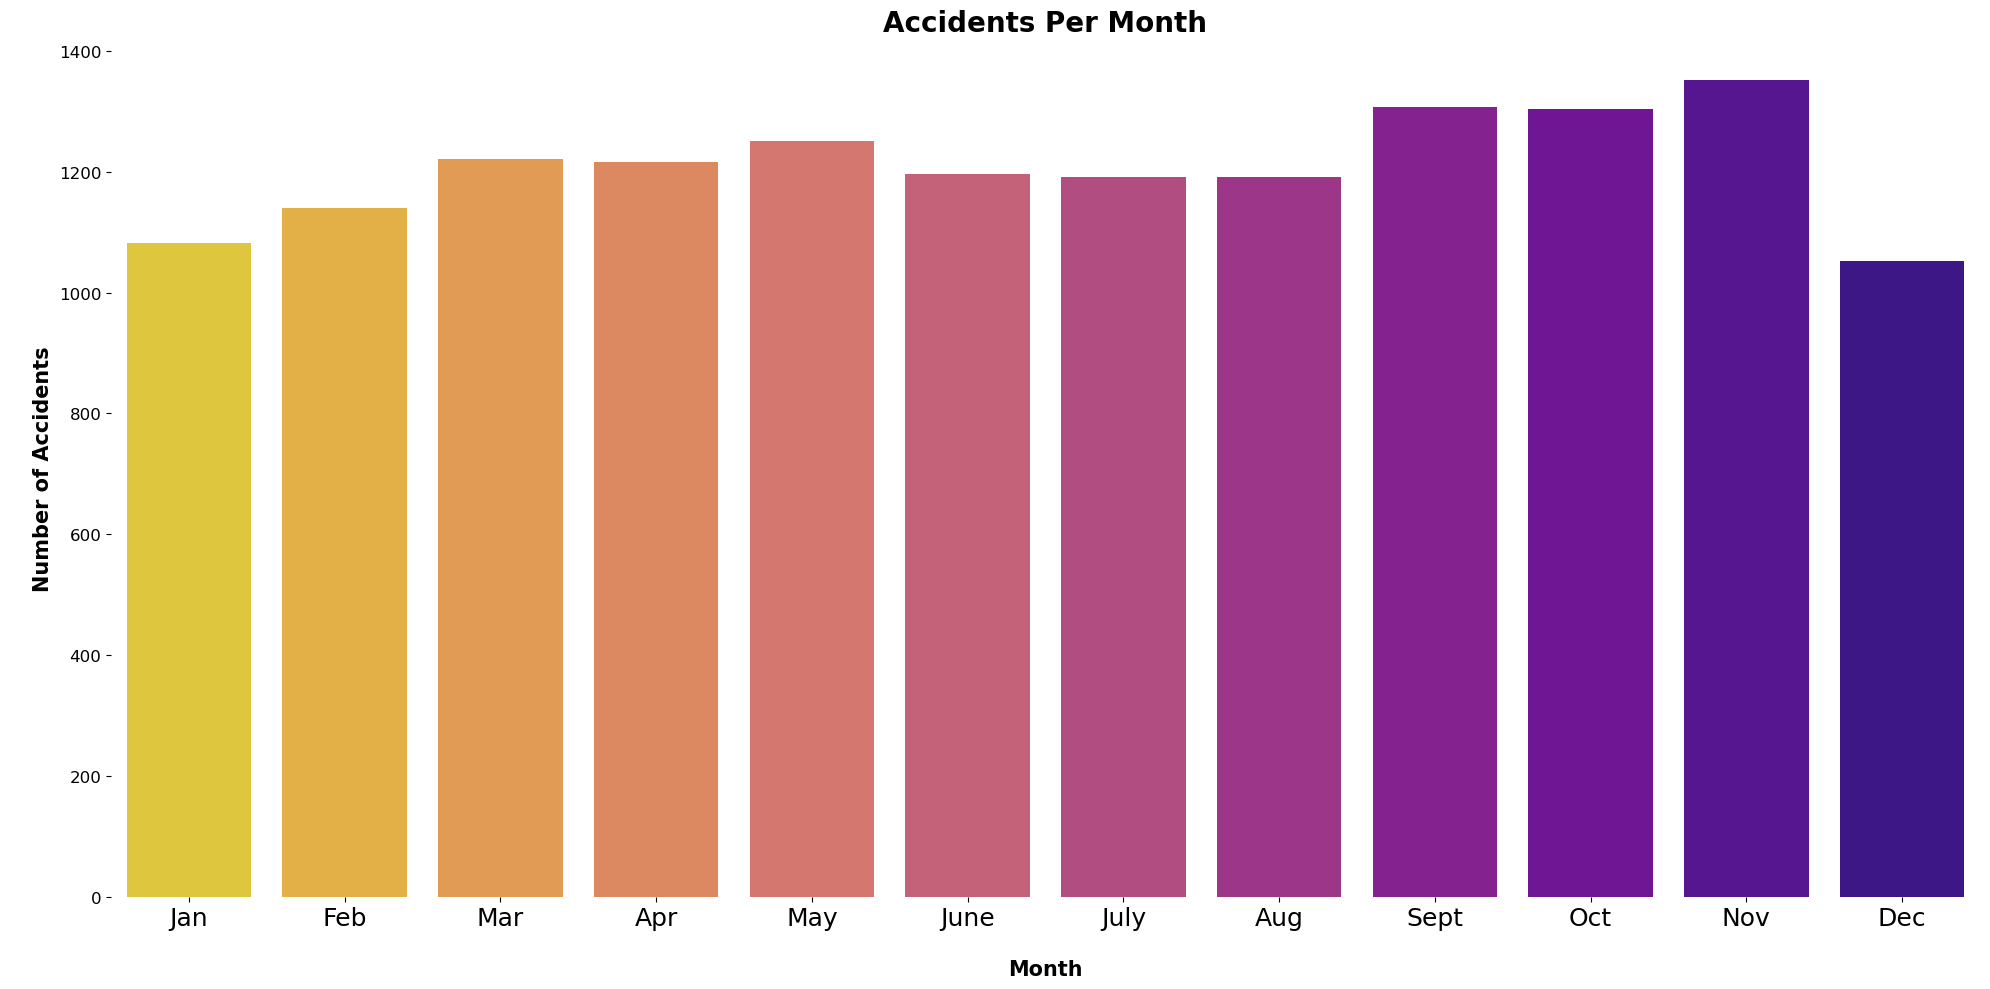

In [82]:
accidentspermonth = df.groupby(['month'])['accident_index'].count()

# prepare plot
plt.style.use('default')
plt.figure(figsize=(20,10))
colors = sns.color_palette("plasma_r", n_colors=12)
mt=sns.barplot(accidentspermonth.index,accidentspermonth.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
#ax is the axes instance
group_labels = ['Jan', 'Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec' ]

mt.set_xticklabels(group_labels)
plt.title("Accidents Per Month",fontsize=20,fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.xlabel("\nMonth", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.savefig('acc_month.png')
plt.tight_layout()


C:\Users\shivk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


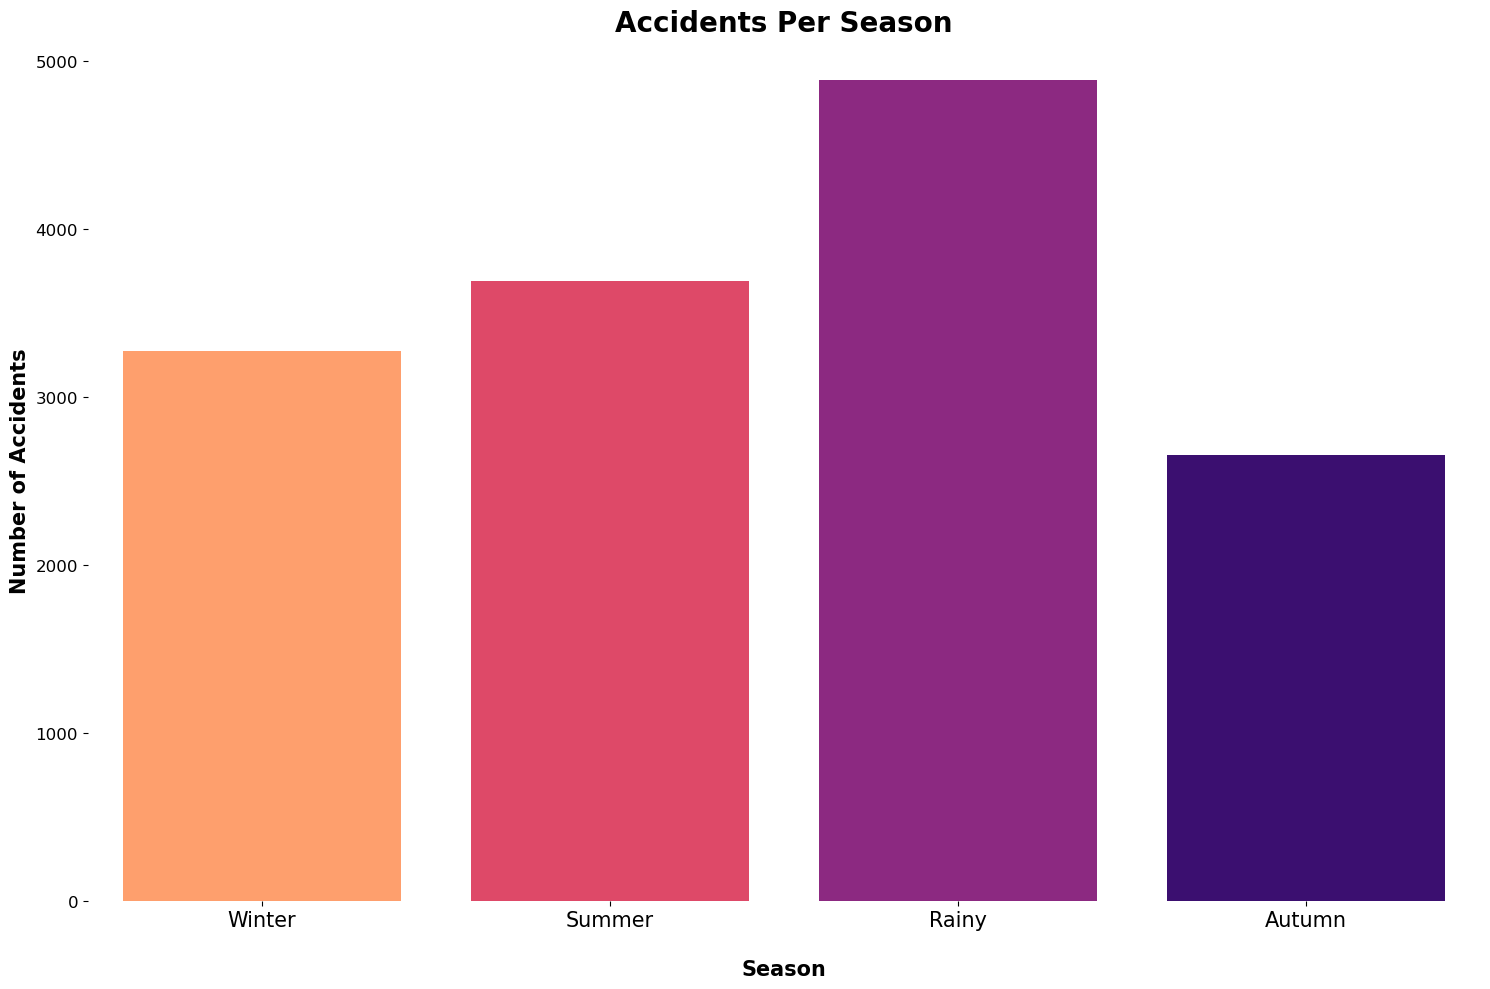

In [83]:
accidentsperseason = df.groupby(['season'])['accident_index'].count()
seaord=['Winter', 'Summer', 'Rainy','Autumn']
# prepare plot
plt.style.use('default')
plt.figure(figsize=(15,10))

sns.barplot(accidentsperseason.index,accidentsperseason.values, order=seaord, 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Season",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nSeason", fontsize=15, fontweight="bold")
plt.ylabel("Number of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('acc_season.png')


In [84]:
timeofdaygroups = {'1': "Morning Rush",
                   '2': "Day",
                   '3': "Lunch Rush",
                   '4': "Afternoon",
                   '5': "After Work Rush",
                   '6': "Evening",
                   '7': "Night"}
df['time_of_day']=df['time_of_day'].map(timeofdaygroups)

In [85]:
df['time_of_day']

5                    Day
10               Evening
11                 Night
12            Lunch Rush
13             Afternoon
              ...       
25995    After Work Rush
25996            Evening
25997         Lunch Rush
25998    After Work Rush
25999       Morning Rush
Name: time_of_day, Length: 14507, dtype: object

C:\Users\shivk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


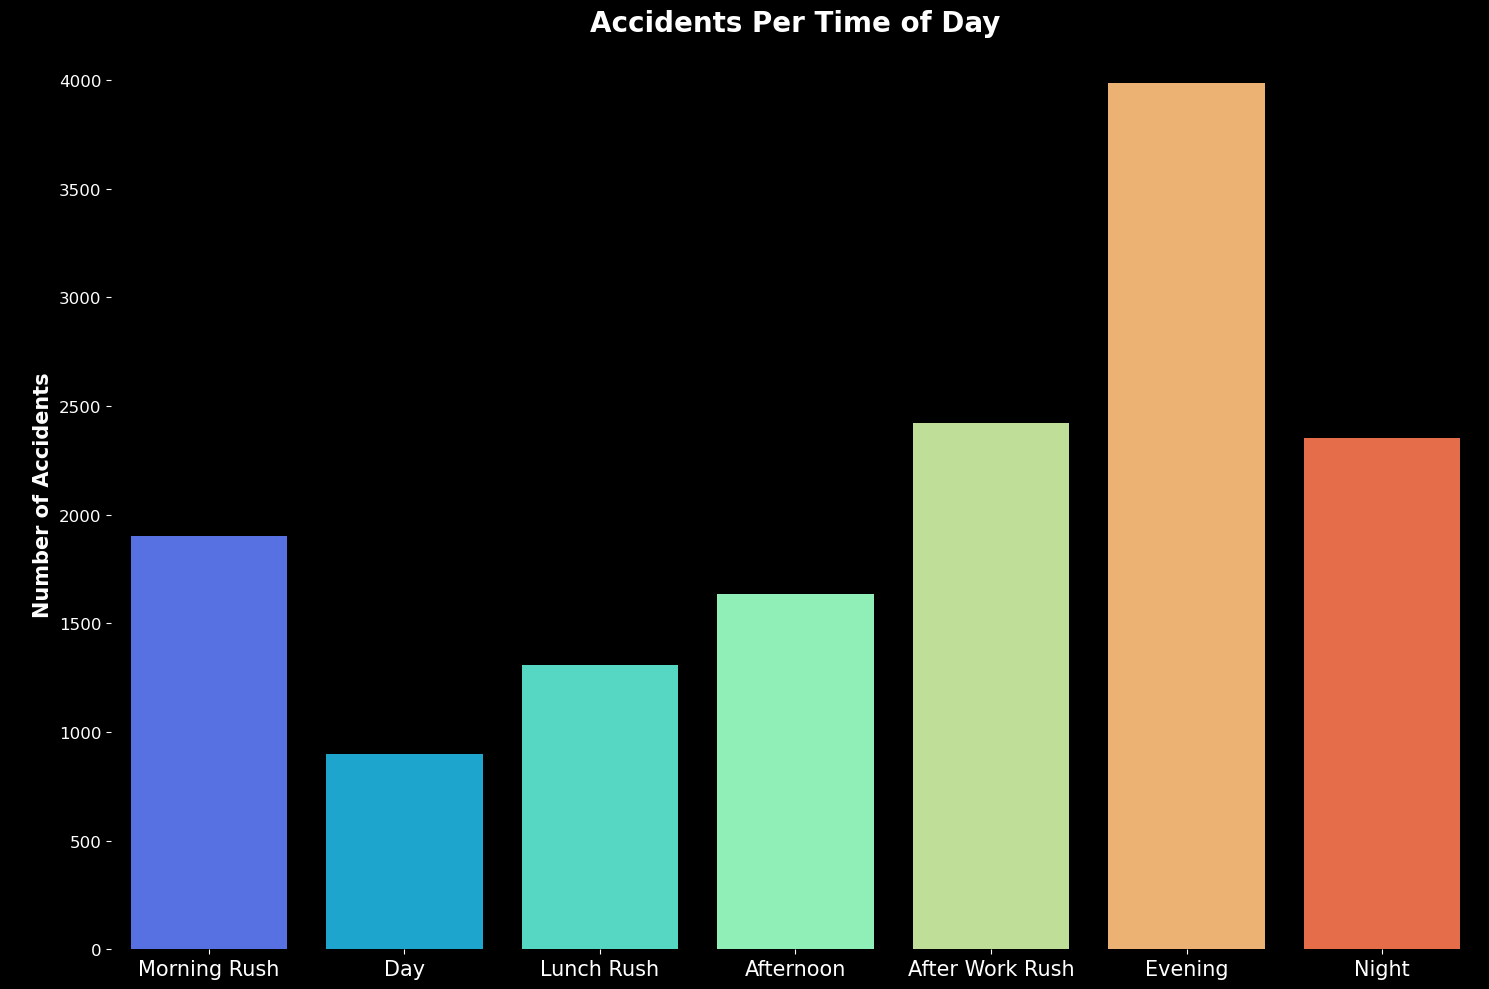

In [86]:
accidentspertod = df.groupby(['time_of_day'])['accident_index'].count()
# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
tod=["Morning Rush", "Day", "Lunch Rush", "Afternoon",
     "After Work Rush", "Evening", "Night"]
sns.barplot(accidentspertod.index,accidentspertod.values, order=tod, palette='rainbow')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Time of Day",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('acc_russ.png')

In [87]:
#print(df['accident_seriousness'])

## Chi-Squared Test

In [88]:
import scipy.stats as stats

In [89]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="The {0} is IMPORTANT for Prediction".format(colX)
        else:
            result="The {0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns,index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
testColumns = ['accident_index', '1st_road_class', '1st_road_number', 
               'carriageway_hazards', 'date', 'day_of_week', 
               'did_police_officer_attend_scene_of_accident','junction_control', 
               'junction_detail', 'latitude', 'light_conditions', 
               'longitude',
               'number_of_casualties', 'number_of_vehicles', 'pedestrian_crossing-human_control',
               'pedestrian_crossing-physical_facilities','road_surface_conditions', 
               'road_type', 'special_conditions_at_site', 'speed_limit', 'time', 
               'urban_or_rural_area', 'weather_conditions', 'year', 'inscotland', 
               'age_band_of_driver', 'age_of_vehicle', 'driver_home_area_type', 
               'driver_imd_decile', 'engine_capacity_cc','hit_object_in_carriageway', 
               'hit_object_off_carriageway', 'journey_purpose_of_driver', 'junction_location', 
               'model','propulsion_code', 'sex_of_driver', 'skidding_and_overturning',
               'towing_and_articulation', 'vehicle_leaving_carriageway',
               'vehicle_locationrestricted_lane', 'vehicle_manoeuvre','vehicle_reference',
               'vehicle_type', 'was_vehicle_left_hand_drive', 'x1st_point_of_impact', 'month',
               'weekend', 'hour', 'time_of_day','season', 'engine_capacity_cc_size']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="accident_seriousness" )  

The accident_index is IMPORTANT for Prediction
The 1st_road_class is IMPORTANT for Prediction
The 1st_road_number is IMPORTANT for Prediction
The carriageway_hazards is NOT an important predictor. (Discard carriageway_hazards from model)
The date is IMPORTANT for Prediction
The day_of_week is IMPORTANT for Prediction
The did_police_officer_attend_scene_of_accident is IMPORTANT for Prediction
The junction_control is IMPORTANT for Prediction
The junction_detail is IMPORTANT for Prediction
The latitude is IMPORTANT for Prediction
The light_conditions is IMPORTANT for Prediction
The longitude is IMPORTANT for Prediction
The number_of_casualties is IMPORTANT for Prediction
The number_of_vehicles is IMPORTANT for Prediction
The pedestrian_crossing-human_control is NOT an important predictor. (Discard pedestrian_crossing-human_control from model)
The pedestrian_crossing-physical_facilities is IMPORTANT for Prediction
The road_surface_conditions is IMPORTANT for Prediction
The road_type is IMP

import pickle
df.to_pickle("df.pkl")
df = pd.read_pickle("df.pkl")
df.head()
df.to_csv('clean_accident_data.csv', index=False)     #to cteate new csv file with modify data

In [90]:
df['weather_conditions'].value_counts()/df.shape[0]*100


Fine no high winds       82.567037
Raining no high winds    10.863721
Other                     2.605639
Fine + high winds         0.923692
Unknown                   0.861653
Snowing no high winds     0.834080
Raining + high winds      0.723789
Fog or mist               0.558351
Snowing + high winds      0.062039
Name: weather_conditions, dtype: float64

In [91]:
df.drop(df[df['weather_conditions'] == 'Data missing or out of range'].index, inplace=True)

In [92]:
df['weather_conditions'] = df['weather_conditions'].replace(to_replace="Unknown",value="Fog or mist")
df['weather_conditions'] = df['weather_conditions'].replace(to_replace="Other",value="Mud")

In [93]:
df['weather_conditions'].value_counts()/df.shape[0]*100

Fine no high winds       82.567037
Raining no high winds    10.863721
Mud                       2.605639
Fog or mist               1.420004
Fine + high winds         0.923692
Snowing no high winds     0.834080
Raining + high winds      0.723789
Snowing + high winds      0.062039
Name: weather_conditions, dtype: float64

In [94]:
df['sex_of_driver'].value_counts()/df.shape[0]*100

Male      73.778176
Female    26.221824
Name: sex_of_driver, dtype: float64

In [95]:
df.drop(df[df['sex_of_driver'] == 'Not known'].index, inplace=True)

In [96]:
df['light_conditions'].value_counts()/df.shape[0]*100

Daylight                   59.371338
Darkness - lights lit      36.265251
Darkness - no lighting      3.922244
Darkness - lights unlit     0.441166
Name: light_conditions, dtype: float64

In [97]:
df.drop(df[df['light_conditions'] == 'Darkness - lighting unknown'].index, inplace=True)

In [98]:
df['light_conditions'].value_counts()/df.shape[0]*100

Daylight                   59.371338
Darkness - lights lit      36.265251
Darkness - no lighting      3.922244
Darkness - lights unlit     0.441166
Name: light_conditions, dtype: float64

In [99]:
df['season'].value_counts()/df.shape[0]*100

Rainy     33.680292
Summer    25.429103
Winter    22.575308
Autumn    18.315296
Name: season, dtype: float64

In [100]:
df['season'].value_counts()/df.shape[0]*100

Rainy     33.680292
Summer    25.429103
Winter    22.575308
Autumn    18.315296
Name: season, dtype: float64

In [101]:
df['vehicle_type'].value_counts()/df.shape[0]*100

Car              74.812160
Motorcycle       19.859378
Goods Vehicle     4.225546
Bus               0.951265
Other Vehicle     0.151651
Name: vehicle_type, dtype: float64

In [102]:
df['vehicle_type'].value_counts()/df.shape[0]*100

Car              74.812160
Motorcycle       19.859378
Goods Vehicle     4.225546
Bus               0.951265
Other Vehicle     0.151651
Name: vehicle_type, dtype: float64

In [103]:
df['age_of_vehicle'].value_counts()/df.shape[0]*100

3    24.029779
2    22.602881
4    21.782588
1    13.903633
5    11.518577
6     4.046322
7     2.116220
Name: age_of_vehicle, dtype: float64

In [104]:
df['age_band_of_driver'].value_counts()/df.shape[0]*100


16-25       88.515889
26-45        6.100503
46-65        5.163025
Over 65      0.206797
Under 16     0.013786
Name: age_band_of_driver, dtype: float64

In [105]:
df['age_band_of_driver'].value_counts()/df.shape[0]*100

16-25       88.515889
26-45        6.100503
46-65        5.163025
Over 65      0.206797
Under 16     0.013786
Name: age_band_of_driver, dtype: float64

In [106]:
df['speed_limit'].value_counts()/df.shape[0]*100

30    69.221755
40    12.070035
60     9.167988
50     4.770111
70     3.715448
20     1.047770
15     0.006893
Name: speed_limit, dtype: float64

In [107]:
df['day_of_week'].value_counts()/df.shape[0]*100

Friday       16.826360
Saturday     15.034121
Thursday     14.530916
Wednesday    13.951885
Tuesday      13.938099
Monday       13.517612
Sunday       12.201006
Name: day_of_week, dtype: float64

In [108]:
df['day_of_week'].value_counts()/df.shape[0]*100

Friday       16.826360
Saturday     15.034121
Thursday     14.530916
Wednesday    13.951885
Tuesday      13.938099
Monday       13.517612
Sunday       12.201006
Name: day_of_week, dtype: float64

In [109]:
df['road_surface_conditions'].value_counts()/df.shape[0]*100

Dry                             68.739229
Wet or damp                     27.324740
Frost or ice                     3.115737
Snow                             0.689322
Data missing or out of range     0.082719
Flood over 3cm. deep             0.048253
Name: road_surface_conditions, dtype: float64

In [110]:
df['road_surface_conditions'].value_counts()/df.shape[0]*100

Dry                             68.739229
Wet or damp                     27.324740
Frost or ice                     3.115737
Snow                             0.689322
Data missing or out of range     0.082719
Flood over 3cm. deep             0.048253
Name: road_surface_conditions, dtype: float64

In [111]:
df['accident_seriousness'].value_counts()/df.shape[0]*100

Not Serious    74.736334
Serious        20.038602
Fatal           5.225064
Name: accident_seriousness, dtype: float64

In [112]:
df.shape

(14507, 55)

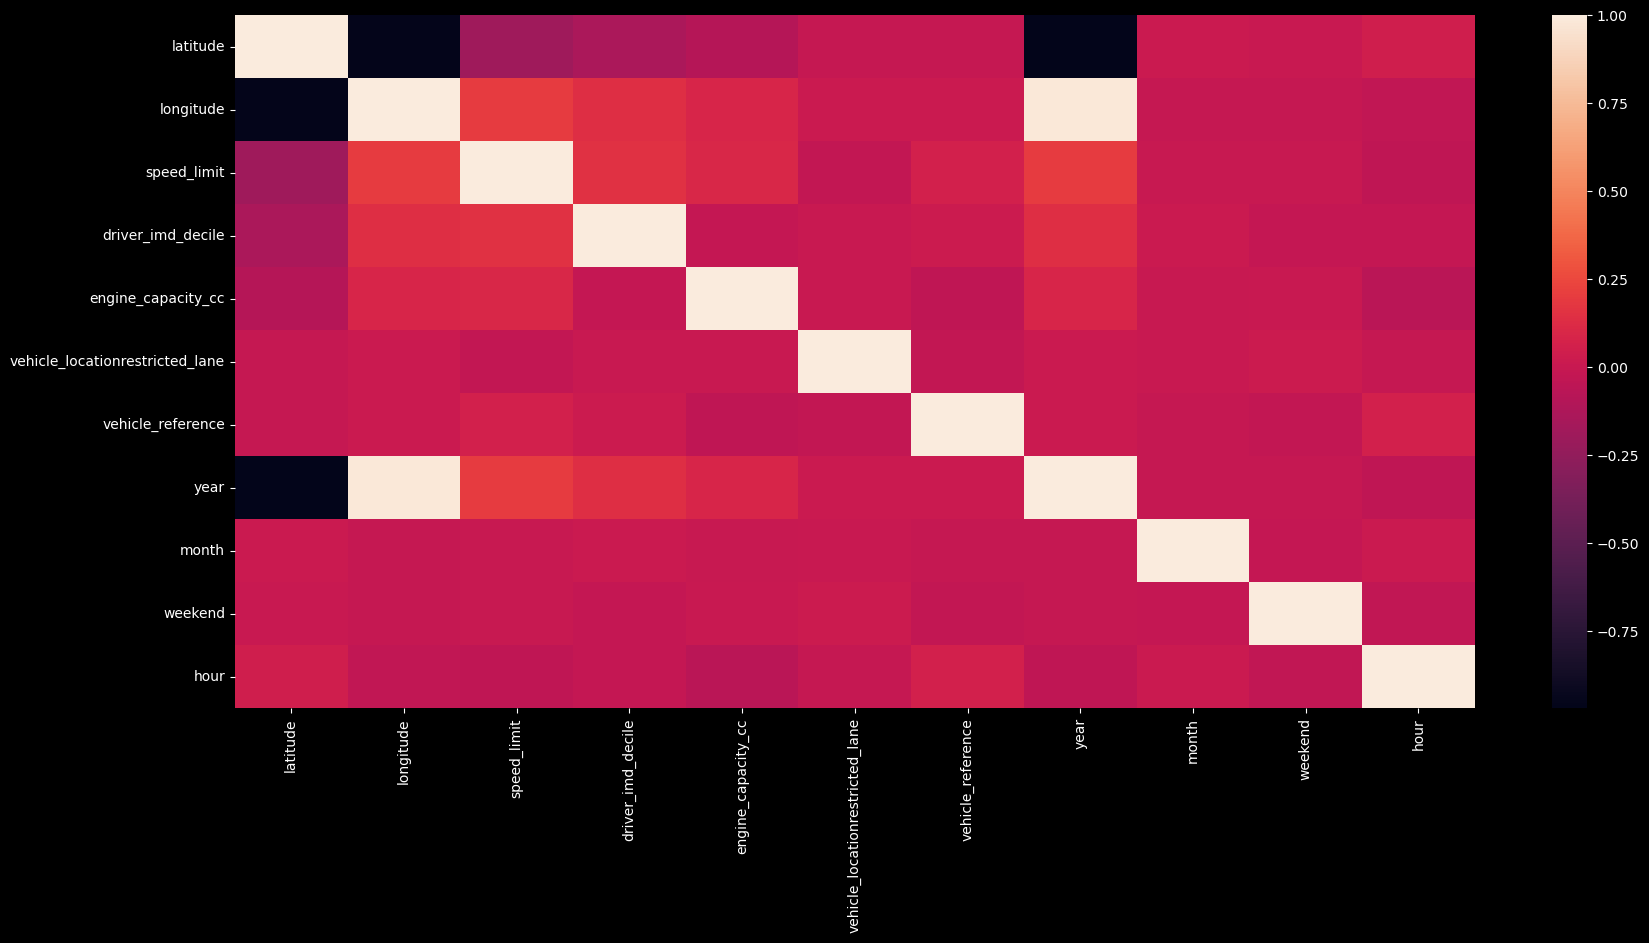

In [113]:
corr =  df.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)
plt.savefig('heat_map.png')

In [114]:
import pickle
#df.to_pickle("df2.pkl")


In [115]:
df.shape

(14507, 55)

# Ml model
.
.
.
.
.
.
.
.
.
.
.
.
.
.
















In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [117]:
#df = pd.read_pickle("/content/df2.pkl")

In [118]:

df1=df[['age_band_of_driver','vehicle_type','age_of_vehicle','weather_conditions','day_of_week','road_surface_conditions', 
                'light_conditions','sex_of_driver','season','speed_limit','accident_seriousness']]
df1.head()

,age_band_of_driver,vehicle_type,age_of_vehicle,weather_conditions,day_of_week,road_surface_conditions,light_conditions,sex_of_driver,season,speed_limit,accident_seriousness
5,16-25,Car,7,Fine no high winds,Tuesday,Wet or damp,Daylight,Male,Rainy,60,Fatal
10,26-45,Car,7,Fine no high winds,Friday,Dry,Daylight,Male,Summer,70,Fatal
11,16-25,Motorcycle,7,Fine no high winds,Saturday,Wet or damp,Darkness - lights lit,Male,Rainy,30,Fatal
12,26-45,Motorcycle,7,Fine no high winds,Saturday,Dry,Daylight,Male,Autumn,30,Fatal
13,46-65,Goods Vehicle,7,Fine no high winds,Thursday,Dry,Daylight,Male,Summer,50,Fatal


In [119]:
df1.columns

Index(['age_band_of_driver', 'vehicle_type', 'age_of_vehicle',
       'weather_conditions', 'day_of_week', 'road_surface_conditions',
       'light_conditions', 'sex_of_driver', 'season', 'speed_limit',
       'accident_seriousness'],
      dtype='object')

In [120]:
print(df1.isnull().sum())

age_band_of_driver         0
vehicle_type               0
age_of_vehicle             0
weather_conditions         0
day_of_week                0
road_surface_conditions    0
light_conditions           0
sex_of_driver              0
season                     0
speed_limit                0
accident_seriousness       0
dtype: int64


In [121]:
df1.isnull()
df1.isnull().sum()
df1.dropna(inplace=True)

C:\Users\shivk\AppData\Local\Temp\ipykernel_5372\4241255522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [122]:
df1.dtypes

age_band_of_driver           object
vehicle_type                 object
age_of_vehicle             category
weather_conditions           object
day_of_week                  object
road_surface_conditions      object
light_conditions             object
sex_of_driver                object
season                       object
speed_limit                   int64
accident_seriousness         object
dtype: object

In [123]:
df1['age_of_vehicle'] = df1['age_of_vehicle'].astype('int64')

C:\Users\shivk\AppData\Local\Temp\ipykernel_5372\1506923678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_of_vehicle'] = df1['age_of_vehicle'].astype('int64')


In [124]:
df1.dtypes

age_band_of_driver         object
vehicle_type               object
age_of_vehicle              int64
weather_conditions         object
day_of_week                object
road_surface_conditions    object
light_conditions           object
sex_of_driver              object
season                     object
speed_limit                 int64
accident_seriousness       object
dtype: object

In [125]:
df1.tail()

,age_band_of_driver,vehicle_type,age_of_vehicle,weather_conditions,day_of_week,road_surface_conditions,light_conditions,sex_of_driver,season,speed_limit,accident_seriousness
25995,16-25,Car,1,Fine no high winds,Monday,Dry,Daylight,Male,Summer,30,Not Serious
25996,16-25,Car,1,Fine no high winds,Friday,Dry,Daylight,Male,Rainy,30,Not Serious
25997,16-25,Car,1,Fine no high winds,Friday,Dry,Daylight,Male,Autumn,30,Not Serious
25998,16-25,Car,1,Fine no high winds,Tuesday,Dry,Daylight,Male,Rainy,30,Not Serious
25999,16-25,Goods Vehicle,1,Fine no high winds,Monday,Dry,Daylight,Male,Winter,40,Not Serious


In [126]:
df.shape

(14507, 55)

In [127]:
from sklearn.preprocessing import LabelEncoder


In [128]:
categorical_cols = ['age_band_of_driver','vehicle_type','weather_conditions','day_of_week','road_surface_conditions', 
                'light_conditions','sex_of_driver','season','accident_seriousness']

In [129]:
le = LabelEncoder()

In [130]:
for col in categorical_cols:
    df1[col] = le.fit_transform(df1[col])
    print(col,"\n")
    print('Original values:', le.classes_)
    print('Encoded values:', le.transform(le.classes_))

C:\Users\shivk\AppData\Local\Temp\ipykernel_5372\1919038953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = le.fit_transform(df1[col])


age_band_of_driver 

Original values: ['16-25' '26-45' '46-65' 'Over 65' 'Under 16']
Encoded values: [0 1 2 3 4]
vehicle_type 

Original values: ['Bus' 'Car' 'Goods Vehicle' 'Motorcycle' 'Other Vehicle']
Encoded values: [0 1 2 3 4]
weather_conditions 

Original values: ['Fine + high winds' 'Fine no high winds' 'Fog or mist' 'Mud'
 'Raining + high winds' 'Raining no high winds' 'Snowing + high winds'
 'Snowing no high winds']
Encoded values: [0 1 2 3 4 5 6 7]
day_of_week 

Original values: ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
Encoded values: [0 1 2 3 4 5 6]
road_surface_conditions 

Original values: ['Data missing or out of range' 'Dry' 'Flood over 3cm. deep'
 'Frost or ice' 'Snow' 'Wet or damp']
Encoded values: [0 1 2 3 4 5]
light_conditions 

Original values: ['Darkness - lights lit' 'Darkness - lights unlit'
 'Darkness - no lighting' 'Daylight']
Encoded values: [0 1 2 3]
sex_of_driver 

Original values: ['Female' 'Male']
Encoded values: [0 1]
seaso

In [131]:
print(df1.head())

    age_band_of_driver  vehicle_type  age_of_vehicle  weather_conditions  \
5                    0             1               7                   1   
10                   1             1               7                   1   
11                   0             3               7                   1   
12                   1             3               7                   1   
13                   2             2               7                   1   

    day_of_week  road_surface_conditions  light_conditions  sex_of_driver  \
5             5                        5                 3              1   
10            0                        1                 3              1   
11            2                        5                 0              1   
12            2                        1                 3              1   
13            4                        1                 3              1   

    season  speed_limit  accident_seriousness  
5        1           60         

In [132]:
df1.tail()

,age_band_of_driver,vehicle_type,age_of_vehicle,weather_conditions,day_of_week,road_surface_conditions,light_conditions,sex_of_driver,season,speed_limit,accident_seriousness
25995,0,1,1,1,1,1,3,1,2,30,1
25996,0,1,1,1,0,1,3,1,1,30,1
25997,0,1,1,1,0,1,3,1,0,30,1
25998,0,1,1,1,5,1,3,1,1,30,1
25999,0,2,1,1,1,1,3,1,3,40,1


In [133]:
encoded_col = le.fit_transform(df1['season'])
print('Encoded values:', encoded_col)
print('Unique values:', df['season'].unique())

Encoded values: [1 2 1 ... 0 1 3]
Unique values: ['Rainy' 'Summer' 'Autumn' 'Winter']


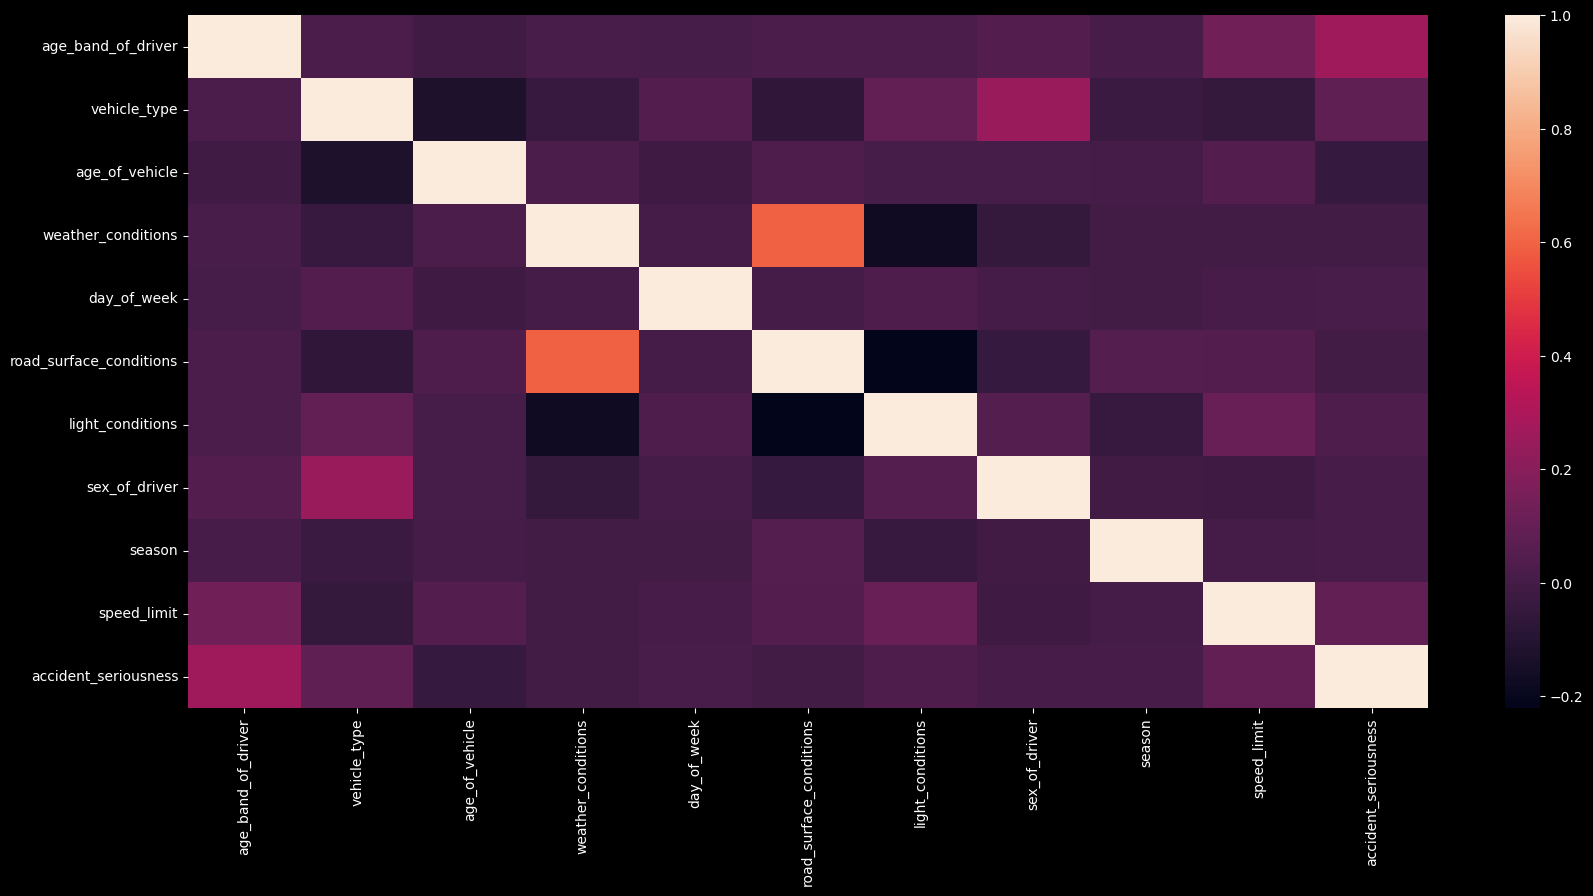

In [134]:
corr =  df1.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)
plt.savefig('heat_map.png')

In [135]:
X = df1.drop('accident_seriousness', axis=1)
y = df1['accident_seriousness']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [137]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (10154, 10)
X_test shape: (4353, 10)
y_train shape: (10154,)
y_test shape: (4353,)


In [138]:
rf = RandomForestClassifier(n_estimators=500, random_state=50)

rf.fit(X_train, y_train)

filename = 'random_forest.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf, file)
    
y_pred = rf.predict(X_test)

# Evaluate the model performance

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.826556397886515
Confusion Matrix:
 [[  81   82   71]
 [  10 3128  109]
 [  13  470  389]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.35      0.48       234
           1       0.85      0.96      0.90      3247
           2       0.68      0.45      0.54       872

    accuracy                           0.83      4353
   macro avg       0.77      0.59      0.64      4353
weighted avg       0.81      0.83      0.81      4353



In [139]:
new_data = pd.DataFrame({
    'age_band_of_driver': [1],  # sample value for age_band_of_driver
    'vehicle_type': [1],  # sample value for vehicle_type
    'age_of_vehicle': [1],  # sample value for age_of_vehicle
    'weather_conditions': [2],  # sample value for weather_conditions
    'day_of_week': [3],  # sample value for day_of_week
    'road_surface_conditions': [3],  # sample value for road_surface_conditions
    'light_conditions': [2],  # sample value for light_conditions
    'sex_of_driver': [5],  # sample value for sex_of_driver
    'season': [6],  # sample value for season
    'speed_limit': [50],  # sample value for speed_limit
})

# Make predictions on the new data using the trained model
predictions = rf.predict(new_data)

In [140]:
print(predictions)

[2]


In [141]:
df1.shape

(14507, 11)

In [142]:
models = [
    RandomForestClassifier(n_estimators=1000, random_state=42),
    GradientBoostingClassifier(n_estimators=1000, random_state=42)  
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(type(model).__name__, "accuracy:", acc)

RandomForestClassifier accuracy: 0.8281644842637261
GradientBoostingClassifier accuracy: 0.8405697220307834


In [143]:
models = [

    SVC(kernel='rbf', C=1, gamma='scale', random_state=42),
    KNeighborsClassifier(n_neighbors=5)
    
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(type(model).__name__, "accuracy:", acc)

SVC accuracy: 0.8217321387548817
KNeighborsClassifier accuracy: 0.788192051458764


In [144]:
models = [
    
    LogisticRegression(random_state=42),
    GaussianNB()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(type(model).__name__, "accuracy:", acc)

LogisticRegression accuracy: 0.8290833907649897
GaussianNB accuracy: 0.8283942108890421


C:\Users\shivk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [145]:
models = [
    
    DecisionTreeClassifier(max_depth=5, random_state=42)
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(type(model).__name__, "accuracy:", acc)

DecisionTreeClassifier accuracy: 0.8426372616586262
MLPClassifier accuracy: 0.8290833907649897


In [146]:
models = [
    AdaBoostClassifier(n_estimators=1000, random_state=42),
    RandomForestClassifier(n_estimators=5000, random_state=42)
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(type(model).__name__, "accuracy:", acc)

AdaBoostClassifier accuracy: 0.7932460372157133
RandomForestClassifier accuracy: 0.8267861245118309


In [147]:
import xgboost as xgb

In [148]:
clf = xgb.XGBClassifier()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = clf.score(X_test, y_test)
print("Test accuracy:", accuracy)

Test accuracy: 0.8364346427750976


In [149]:
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import GridSearchCV

# # define the hyperparameter grid
# param_grid = {
#     'num_leaves': [31, 63, 127, 255],
#     'max_depth': [3, 5, 7, 10],
#     'learning_rate': [0.1, 0.05, 0.01, 0.005],
#     'n_estimators': [100, 200, 400, 800],
#     'min_child_samples': [10, 20, 30],
#     'min_child_weight': [0.001, 0.01, 0.1],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# # create an instance of the LGBMClassifier
# lgbm = LGBMClassifier()

# # create a GridSearchCV object and fit it to the data
# grid_search = GridSearchCV(lgbm, param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # print the best hyperparameters and the corresponding score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

In [150]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Define the hyperparameters
params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.01,
    'max_depth': 10,
    'min_child_samples': 10,
    'min_child_weight': 0.01,
    'n_estimators': 1000,
    'num_leaves': 32,
    'subsample': 0.8
}

# Create an instance of LGBMClassifier
lgbm = LGBMClassifier(**params)

# Train the model on the training data
lgbm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lgbm.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8442453480358374


In [151]:
def cm_plot(var):
    plt.figure(figsize=(15,5))
    plt.style.use('dark_background')
    plt.clf()
    plt.imshow(var, interpolation='nearest', cmap='tab20')
    classNames = ['Not Serious','Serious', 'Fatal']
    plt.title('Confusion Matrix')
    plt.ylabel('Actual\n')
    plt.xlabel('Predicted\n')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP', 'FN'], ['FP', 'TP', 'FN'], ['FP', 'FN', 'TP']]
    
    for i in range(3):
        for j in range(3):
            plt.text(j,i, str(s[i][j])+"="+str(var[i][j]),horizontalalignment='center', 
                     color='black')
    plt.show()






BaggingClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 82.4029%
Cross validation scores: 81.751
Log Loss: 1.1138280192179537


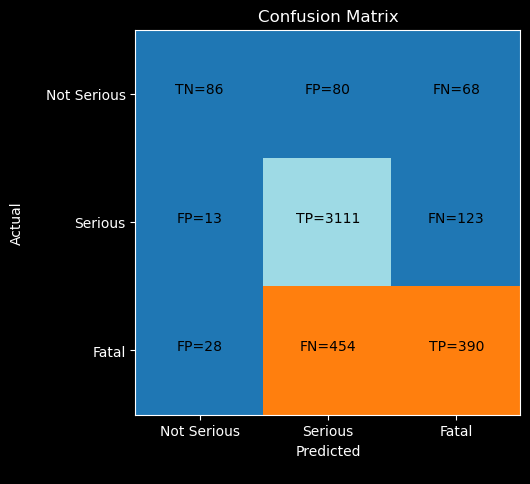

C:\Users\shivk\AppData\Local\Temp\ipykernel_5372\2997225926.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_final)






AdaBoostClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 82.9773%
Cross validation scores: 83.031
Log Loss: 0.9982351220057307


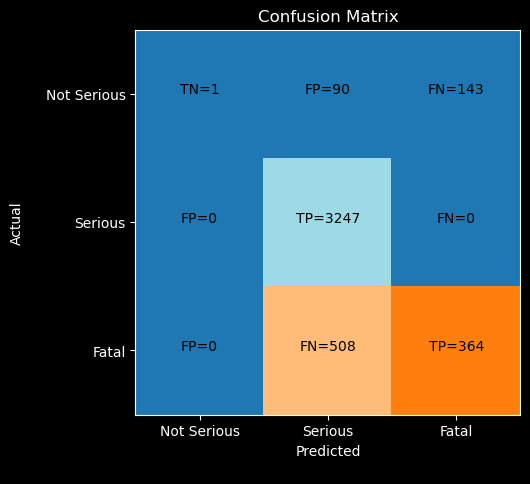

C:\Users\shivk\AppData\Local\Temp\ipykernel_5372\2997225926.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_final)






RandomForestClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 83.8272%
Cross validation scores: 84.046
Log Loss: 0.6816941769147299


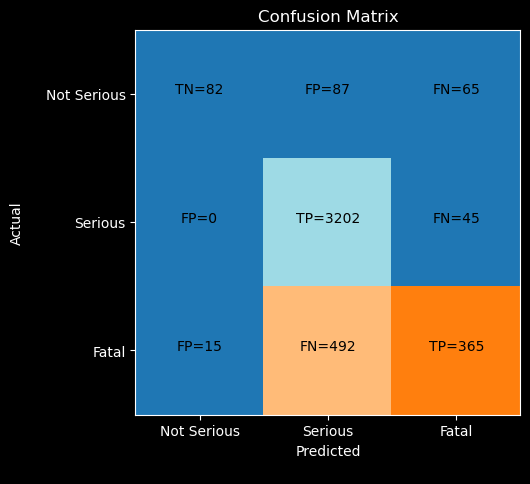

C:\Users\shivk\AppData\Local\Temp\ipykernel_5372\2997225926.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_final)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10




LGBMClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 83.5516%
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
Cross validation scores: 83.396
Log Loss: 0.4889965355508766


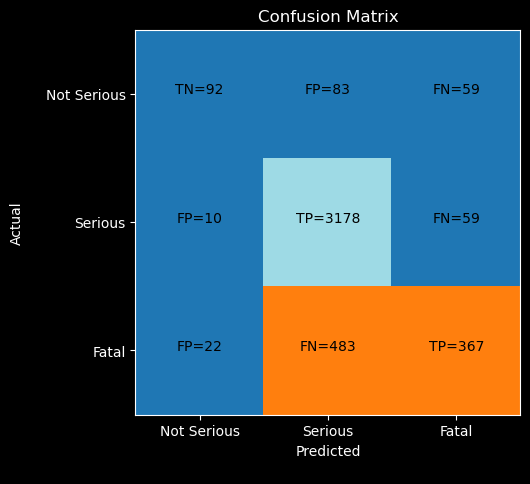

C:\Users\shivk\AppData\Local\Temp\ipykernel_5372\2997225926.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_final)






XGBClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 83.7124%
Cross validation scores: 83.819
Log Loss: 0.4753974988175543


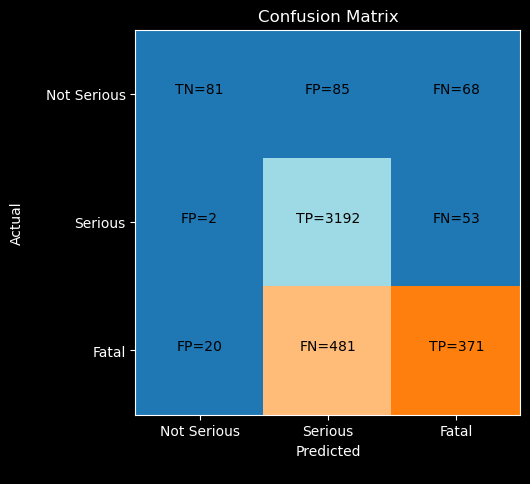

C:\Users\shivk\AppData\Local\Temp\ipykernel_5372\2997225926.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_final)


In [152]:

#Try modeling using  different classification models
classifiers = [
    BaggingClassifier(max_features=X.shape[1], n_estimators=500, random_state=42),
    AdaBoostClassifier( n_estimators=500, learning_rate=0.05, random_state=42),
    RandomForestClassifier(criterion='entropy', max_depth=40,max_features=X.shape[1], 
                           min_samples_split=8, n_estimators=500, random_state=42),
    LGBMClassifier(learning_rate =0.03, max_depth=40, min_data_in_leaf=10,
                   n_estimators=500, num_leaves=50, random_state = 42),
     XGBClassifier(learning_rate=0.05, n_estimators=500, subsample= 1,random_state = 42,gamma = 1, max_depth=40)
    ]
    

#putting results in df
res_cols=["Classifier", "Accuracy", "Log Loss", "Cross Val", "Recall", "Roc Auc","F1", 
          "False Positive Rate", "Error Rate"]
results = pd.DataFrame(columns=res_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("\n"*3)
    print(name,"Results:")
       
    print('~'*40)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.4%}".format(acc))
    
    #cv= np.mean(cross_val_score(clf, res_X_train, res_y_train, cv=3))
    #print("Cross validation scores:",cv)
    
    
    cv= np.mean(cross_val_score(clf,X_train, y_train, cv=3))
    if isinstance(cv, list):
        cv = [round(x * 100, 3) for x in cv]
    else:
        cv = round(cv * 100, 3)
    print("Cross validation scores:", cv)
    
    
    
    train_predictions = clf.predict_proba(X_test)
    logloss = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(logloss))
    
    cm = confusion_matrix(y_test, y_pred)
    #cm = confusion_matrix(y_test-1, y_pred-1, labels=[0,1,2])
     
    cm_plot(cm)
    
    tn, fp, fn = cm[0, 0], cm[0, 1], cm[0, 2]
    tp, fn, fp = cm[1, 1], cm[1, 0], cm[1, 2]
    tn, fp, fn = cm[2, 0], cm[2, 1], cm[2, 2]

    fpr = [fp / (fp + tn), fp / (fp + tn), fp / (fp + tn)]
    ers = 1 - acc
    rec= recall_score(y_test, y_pred, average='weighted')
    roc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovo')
    f1s= f1_score(y_test, y_pred, average='weighted')
    results_final = pd.DataFrame([[name, round(acc*100,3), round(logloss,3), 
                                   round(cv*100,3), round(rec*100,3), round(roc*100,3),round(f1s*100,3),
                                   np.round(fpr*100,3),round(ers*100,3)]],columns=res_cols)
    results = results.append(results_final)

In [161]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create an instance of the XGBClassifier
xgb = XGBClassifier()

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best score: 0.8483352858282822


In [154]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the hyperparameters
params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.01,
    'max_depth': 10,
    'n_estimators': 500,
    'subsample': 0.8
}

# Create an instance of the XGBClassifier
xgb_classifier = xgb.XGBClassifier(**params)

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8435561681598898


In [155]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# # Define the hyperparameter grid
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }

# # Create an instance of the SVM classifier
# svm = SVC()

# # Create a GridSearchCV object and fit it to the data
# grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Get the best estimator from the grid search
# best_svm = grid_search.best_estimator_

# # Make predictions on the test data
# y_pred = best_svm.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [156]:
# Define the hyperparameters
params = {
    'bootstrap': True,
    'max_depth': 30,
    'max_features': 'auto',
    'min_samples_leaf': 2,
    'min_samples_split': 15,
    'n_estimators': 1000
}

# Create an instance of the RandomForestClassifier
rf_classifier = RandomForestClassifier(**params)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8442453480358374


In [160]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_leaf_nodes': [None, 5, 10, 20],
    'random_state': [42]
}

# Create a DecisionTreeClassifier object
clf = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding mean cross-validated score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the DecisionTreeClassifier using the best hyperparameters
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = best_clf.score(X_test, y_test)

print("Best Hyperparameters: ", best_params)
print("Best Mean Cross-validated Score: ", best_score)
print("Test Set Accuracy: ", accuracy)


Best Hyperparameters:  {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
Best Mean Cross-validated Score:  0.8480397678350104
Test Set Accuracy:  0.8451642545371009
